In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

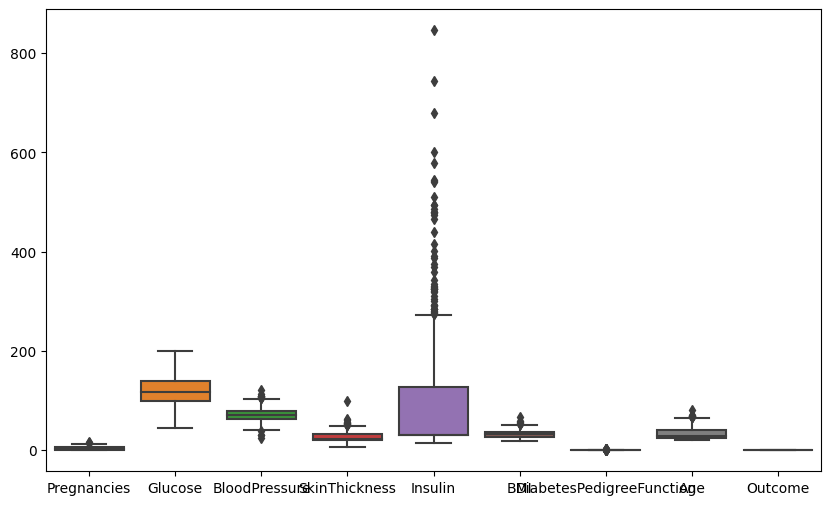

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(df)

In [25]:
import matplotlib.pyplot as plt

In [5]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [6]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
import pickle
def standardize(df1,df2):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(df1)
    X_test_scaled=scaler.transform(df2)
    pickle.dump(scaler,open('/config/workspace/Model/scaler.pkl','wb'))

    return X_train_scaled,X_test_scaled

In [9]:
X_train_scaled,X_test_scaled=standardize(X_train,X_test)

In [10]:
X_train_scaled

array([[ 0.04853303,  1.54139685, -0.04222824, ...,  1.66722741,
         0.05370085, -0.62107929],
       [ 0.64332082, -0.46302398, -2.32278199, ..., -1.22608565,
         1.07195276,  0.14350752],
       [ 0.94071471,  2.33680195,  1.42384203, ...,  1.10627896,
        -0.03166159,  0.65323206],
       ...,
       [-0.24886086, -0.20849435,  0.12066845, ..., -0.88656422,
        -1.08040009, -0.79098747],
       [-0.84364865, -1.09934806, -3.46305887, ...,  3.35007276,
         0.10552804, -0.62107929],
       [ 0.34592693, -0.84481843,  0.12066845, ...,  0.19104728,
         1.63290591,  0.82314024]])

In [11]:
## Lets train our model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import GridSearchCV

In [49]:
## Hyperparameter Tuning For Logistic Regression
import warnings
warnings.filterwarnings('ignore')

parameters={
    'penalty':['l1','l2','elasticnet'],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'C' : np.linspace(-3,10,14)

}

grid=GridSearchCV(LogisticRegression(),param_grid=parameters,verbose=3,cv=8)

grid.fit(X_train_scaled,y_train)

Fitting 8 folds for each of 126 candidates, totalling 1008 fits
[CV 1/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/8] END C=-3.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/8] END ....C=-3.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/8] END ....C=-3.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/8] END ....C=-3.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/8] END ....C=-3.0, penalty=l1, solver=l

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10.]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

In [50]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [51]:
log_reg=LogisticRegression(C=1,penalty='l2',solver='newton-cg')
log_reg.fit(X_train_scaled,y_train)
y_pred1=log_reg.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
matrix=pd.DataFrame(confusion_matrix(y_test,y_pred1))
accuracy=accuracy_score(y_test,y_pred1)
report=classification_report(y_test,y_pred1)
print(accuracy)
print('------------------------------------------')
print(report)
print('------------------------------------------')
matrix

0.7395833333333334
------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       121
           1       0.72      0.48      0.58        71

    accuracy                           0.74       192
   macro avg       0.73      0.69      0.69       192
weighted avg       0.74      0.74      0.72       192

------------------------------------------


,0,1
0,108,13
1,37,34


In [57]:
## cv for decision trees
parameters={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,9],
  'max_features':['auto', 'sqrt', 'log2']
    
}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=8,verbose=3,scoring='accuracy')
grid.fit(X_train_scaled,y_train)

Fitting 8 folds for each of 162 candidates, totalling 1296 fits
[CV 1/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.750 total time=   0.0s
[CV 2/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 3/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.653 total time=   0.0s
[CV 4/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.694 total time=   0.0s
[CV 5/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.625 total time=   0.0s
[CV 6/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.694 total time=   0.0s
[CV 7/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.667 total time=   0.0s
[CV 8/8] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 1/8] END criterion=gini, max_depth=1, max_features=auto, splitter=ra

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [58]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [59]:
grid.best_score_

0.765625

In [71]:
decisiontree_clf=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='log2',splitter='best')
decisiontree_clf.fit(X_train_scaled,y_train)
y_pred2=decisiontree_clf.predict(X_test_scaled)

In [72]:
matrix=pd.DataFrame(confusion_matrix(y_test,y_pred2))
accuracy=accuracy_score(y_test,y_pred2)
report=classification_report(y_test,y_pred2)
print(accuracy)
print('------------------------------------------')
print(report)
print('------------------------------------------')
matrix

0.734375
------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       121
           1       0.64      0.66      0.65        71

    accuracy                           0.73       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192

------------------------------------------


,0,1
0,94,27
1,24,47


In [74]:
## SVC 
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial'],
               'degree':[2,3,4,5,6,7,8,9,10]
              }
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring='accuracy',cv=10,verbose=3)
grid.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[CV 1/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 2/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.845 total time=   0.0s
[CV 4/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.741 total time=   0.0s
[CV 5/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 6/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.707 total time=   0.0s
[CV 7/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.842 total time=   0.0s
[CV 8/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.702 total time=   0.0s
[CV 9/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.825 total time=   0.0s
[CV 10/10] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 1/10] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.655

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [75]:
grid.best_score_

0.7830611010284331

In [76]:
grid.best_params_

{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}

In [77]:
svc_clf=SVC(C=1,degree=2,kernel='linear',gamma=1)
svc_clf.fit(X_train_scaled,y_train)
y_pred3=svc_clf.predict(X_test_scaled)

In [81]:
matrix=pd.DataFrame(confusion_matrix(y_test,y_pred3))
accuracy=accuracy_score(y_test,y_pred3)
report=classification_report(y_test,y_pred3)
print(accuracy)
print('------------------------------------------')
print(report)
print('------------------------------------------')
matrix

0.734375
------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       121
           1       0.72      0.46      0.56        71

    accuracy                           0.73       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192

------------------------------------------


,0,1
0,108,13
1,38,33


In [83]:
pickle.dump(log_reg,open('/config/workspace/Model/model.pkl','wb'))

In [24]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=150,max_samples=300,max_features=4)
random_clf.fit(X_train_scaled,y_train)
y_pred4=random_clf.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
matrix=pd.DataFrame(confusion_matrix(y_test,y_pred4))
accuracy=accuracy_score(y_test,y_pred4)
report=classification_report(y_test,y_pred4)
print(accuracy)
print('------------------------------------------')
print(report)
print('------------------------------------------')
matrix

0.7604166666666666
------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       121
           1       0.75      0.54      0.62        71

    accuracy                           0.76       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.76      0.75       192

------------------------------------------


,0,1
0,108,13
1,33,38


In [27]:
## Cross Validation
parameters={
    'n_estimators':[100,150,200],
    'max_samples':[100,200,300],
    'bootstrap':[True,False],
    'max_depth':[5,6,7,8,9,10]
}

grid=GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=8,verbose=3,refit=True,scoring='accuracy')
grid.fit(X_train_scaled,y_train)

Fitting 8 folds for each of 108 candidates, totalling 864 fits
[CV 1/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.819 total time=   0.2s
[CV 2/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.819 total time=   0.2s
[CV 3/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.736 total time=   0.2s
[CV 4/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.764 total time=   0.2s
[CV 5/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.708 total time=   0.2s
[CV 6/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.875 total time=   0.2s
[CV 7/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.778 total time=   0.2s
[CV 8/8] END bootstrap=True, max_depth=5, max_samples=100, n_estimators=100;, score=0.750 total time=   0.2s
[CV 1/8] END bootstrap=True, max_depth=5, max_samples=100, n_esti

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `boo

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_samples': [100, 200, 300],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [28]:
grid.best_score_

0.7847222222222221

In [29]:
grid.best_params_

{'bootstrap': True, 'max_depth': 6, 'max_samples': 100, 'n_estimators': 150}

In [31]:
random_clf=RandomForestClassifier(n_estimators=150,max_samples=100,bootstrap=True,max_depth=6)
random_clf.fit(X_train_scaled,y_train)
y_pred4=random_clf.predict(X_test_scaled)

In [32]:
matrix=pd.DataFrame(confusion_matrix(y_test,y_pred4))
accuracy=accuracy_score(y_test,y_pred4)
report=classification_report(y_test,y_pred4)
print(accuracy)
print('------------------------------------------')
print(report)
print('------------------------------------------')
matrix

0.7083333333333334
------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       121
           1       0.68      0.39      0.50        71

    accuracy                           0.71       192
   macro avg       0.70      0.64      0.65       192
weighted avg       0.70      0.71      0.69       192

------------------------------------------


,0,1
0,108,13
1,43,28
